<img src="images/feature_engineering.png" alt="drawing" width="1000"/>

# **Feature Engineering**

Import relevant libraries & load in data

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [30]:
housing_prices = pd.read_csv("data/Ames_Housing_Data.csv")
housing_prices

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


## Outliers

When looking at the correlation factors, it can be seen that the Overall Quality is most strongly correlated with the Sale Price of the hosue

In [31]:
housing_prices_numeric = housing_prices.select_dtypes(include='number')
housing_prices_numeric.corr()['SalePrice'].sort_values(ascending=False).head()

SalePrice       1.000000
Overall Qual    0.799262
Gr Liv Area     0.706780
Garage Cars     0.647877
Garage Area     0.640401
Name: SalePrice, dtype: float64

When looking at the scatter plot of the *Sale Price* vs *Overall Quality*, two things can be observed: first the *Overall Quality* has an accuracy of 1.0 (no decimal place values); second there is a clear upward trend, but within each value of *Overall Quality* there appear to be some outliers. 

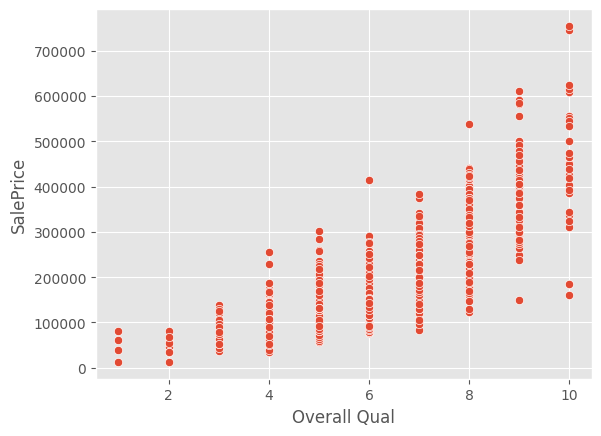

In [32]:
plt.figure(dpi=100)
sns.scatterplot(housing_prices, x='Overall Qual', y='SalePrice')
plt.show()

To explore these potential outliers we can look at the second most correlated feature, the *Ground Living Area*. From the scatter plot of *Sale Price* vs *Ground Living Area* it can be seen there are some clear outliers for large living areas (i.e. mansions). 

These houses do not follow the main housing trend, even intuitively speaking it doesn't make sense for massive houses to be sold super cheap. 

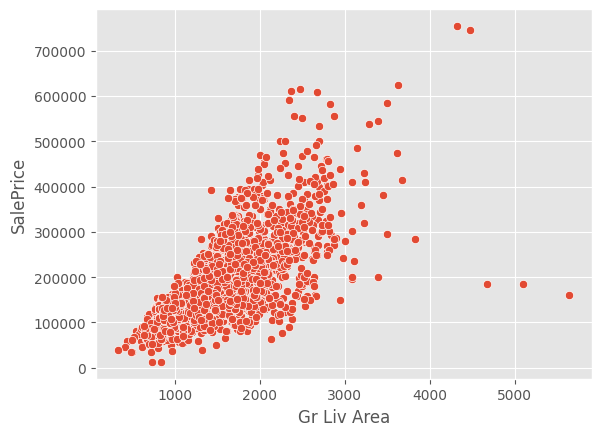

In [33]:
plt.figure(dpi=100)
sns.scatterplot(housing_prices, x='Gr Liv Area', y='SalePrice')
plt.show()

From visual inspection of the above scatter plot we can choose the points to be removed: those whose *Ground Living Area* is larger than 4000 and whose *Sale Price* falls below 400,000.00

In [34]:
housing_prices[(housing_prices['Gr Liv Area']>4000) & (housing_prices['SalePrice'] < 400_000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


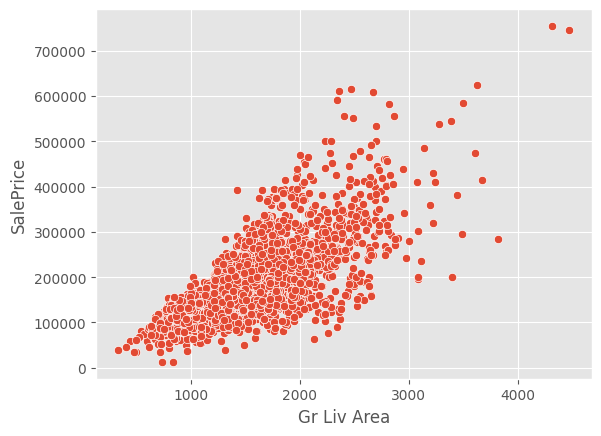

In [35]:
drop_idx = housing_prices[(housing_prices['Overall Qual'] > 8) & (housing_prices['SalePrice'] < 200_000)].index
housing_prices = housing_prices.drop(drop_idx, axis='rows')

plt.figure(dpi=100)
sns.scatterplot(housing_prices, x='Gr Liv Area', y='SalePrice')
plt.show()

*NOTE: It should be considered that these outliers might be valid data points to consider in the model. They might be indicative of the housing market trend. To investigate this you would need to consider when these houses were brought to the market.*

## Missing Data 

If there are missing values in your data set you can either
* Leave them in as <code>NaN</code>
* Replace them
* Remove them

First off we can remove the unique identifier column "PID", as we already have a pandas <code>DataFrame</code> index and the machine learning algorithm doesn't really need this information. 

In [36]:
housing_prices = housing_prices.drop('PID', axis='columns')

We can use the <code>isnull</code> method in order to generate a series of boolean values whether or not a value of a give column is <code>NaN </code>. By counting all the <code>True</code> values and dividing this by the length of the <code>DataFrame</code> we can determine the percent of missing data for each column/feature. 

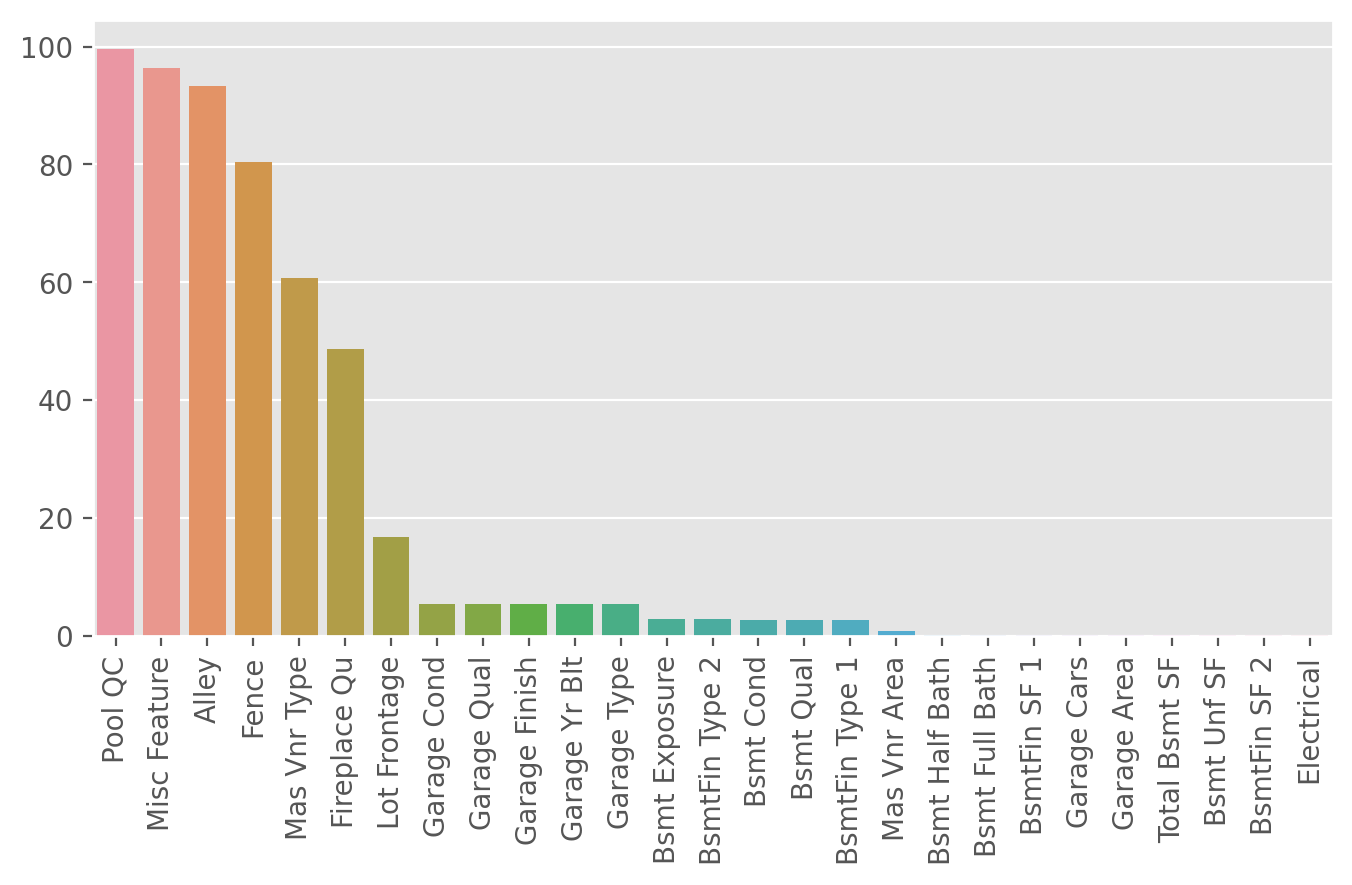

In [37]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values(ascending=False)
    return percent_nan

percent_nan = percent_missing(housing_prices)

plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.show()

For features missing very little data we can tackle those individual rows containing the <code>NaN</code> values. However for the features with a lot of missing data, the entire column needs to be tackled.

### Rows

When deciding whether or not to drop a row we need to consider how much data we are willing to throw away or alter. This will probably be decided by speaking to a "domain specialist", in this case an experienced realtor. 

For now we will choose an arbitrary limit of 1%

In [38]:
percent_nan[percent_nan<1]

Mas Vnr Area      0.786056
Bsmt Half Bath    0.068353
Bsmt Full Bath    0.068353
BsmtFin SF 1      0.034176
Garage Cars       0.034176
Garage Area       0.034176
Total Bsmt SF     0.034176
Bsmt Unf SF       0.034176
BsmtFin SF 2      0.034176
Electrical        0.034176
dtype: float64

When looking at the features of *Electrical* and *Garage Cars*, we can see that the <code>NaN value</code> occurs on different rows. 

In [39]:
idx_electrical = housing_prices[housing_prices['Electrical'].isnull()].index[0]
idx_garage_cars = housing_prices[housing_prices['Garage Cars'].isnull()].index[0]

print(f"Row containing NaN for feature Electrical: {idx_electrical} ")
print(f"Row containing NaN for feature Garage Cars: {idx_garage_cars} ")


Row containing NaN for feature Electrical: 1577 
Row containing NaN for feature Garage Cars: 2236 


We can decide to drop the rows containing NaN values for features *Electrical* and *Garage Cars*, and if we now look at the <code>percent_nan</code> we find that fewer features are below 1%. This suggests that the row which had a <code>NaN</code> value for the *Electrical* feature also contained  <code>NaN</code> values for other features.  

In [40]:
housing_prices = housing_prices.dropna(axis='rows', subset=['Electrical', 'Garage Cars'])
percent_nan = percent_missing(housing_prices)
percent_nan[percent_nan<1]

Mas Vnr Area      0.786594
Bsmt Half Bath    0.068399
Bsmt Full Bath    0.068399
BsmtFin SF 1      0.034200
Bsmt Unf SF       0.034200
BsmtFin SF 2      0.034200
Total Bsmt SF     0.034200
dtype: float64

The remaining features containing less than 1% <code> NaN </code> values mostly relate to the basement. When looking at the <code>Ames_Housing_Feature_Description.txt</code> file we can see that a <code>NaN</code> value for certain feature is not necisarily missing data, but rather that said feature is not present (e.g. no basement present). 

In [41]:
# # NUMERIC COLUMNS --> replace NaN with 0
numeric_columns = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
                   'Bsmt Half Bath', 'Bsmt Full Bath', 'Mas Vnr Area']
housing_prices[numeric_columns] = housing_prices[numeric_columns].fillna(0)

# # STRING COLUMNS --> replace NaN with "None"
string_columns = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 
                  'BsmtFin Type 2', 'Mas Vnr Type']
housing_prices[string_columns] = housing_prices[string_columns].fillna('None')

percent_nan = percent_missing(housing_prices)
percent_nan[percent_nan<1]

Series([], dtype: float64)

### Columns

Similar to before we can use "None" in case <code>NaN</code> values denote that there is no garage for the given house

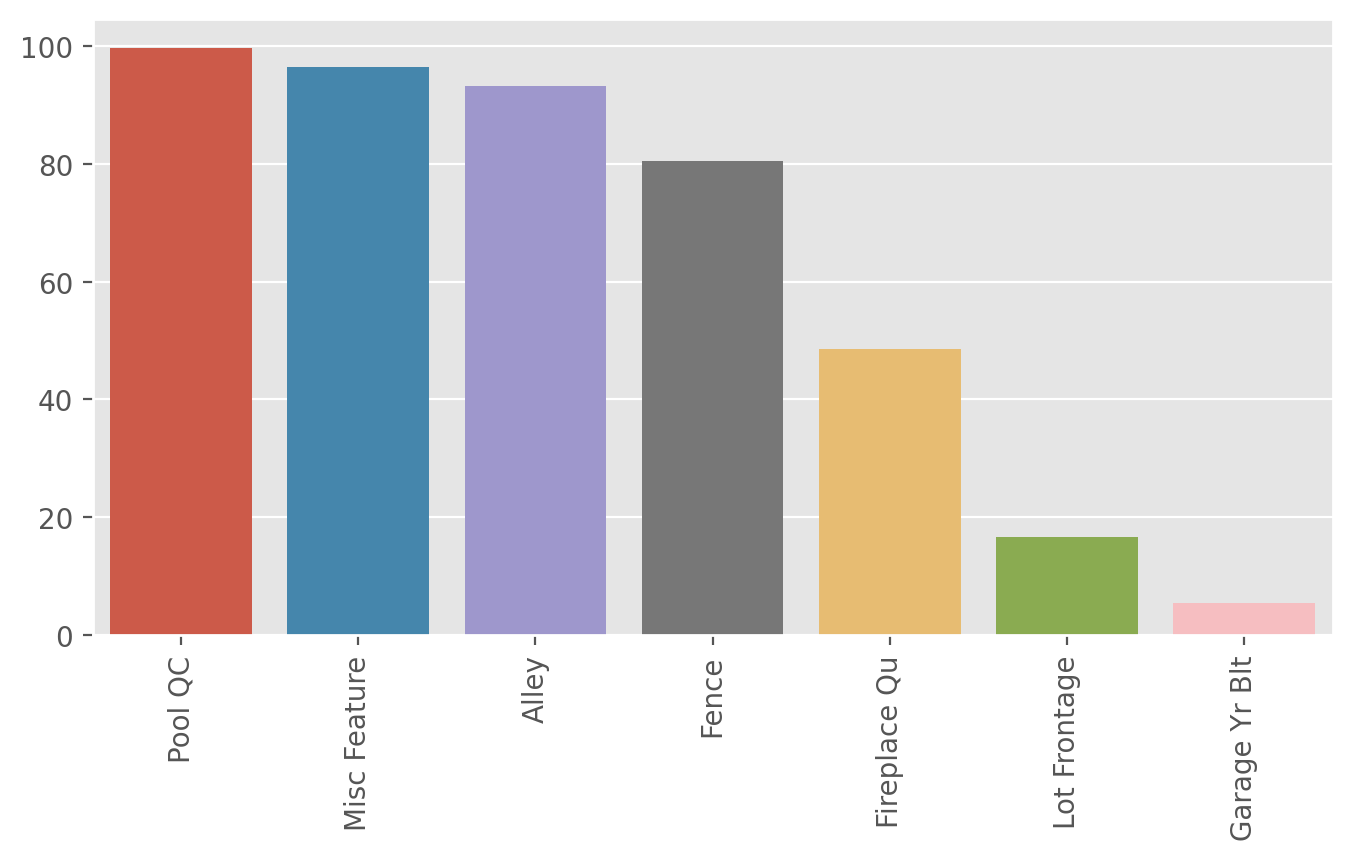

In [42]:
garage_string_columns = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
housing_prices[garage_string_columns] = housing_prices[garage_string_columns].fillna('None')
percent_nan = percent_missing(housing_prices)

plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.show()

The *Garage Year Built* feature is interesting. Because only a couple percent of the rows contain <code>NaN</code> values, it would be a shame not to use it. We also want the statistical predictive model to "know" that the house does not have a garage if a <code>NaN</code> value is found. 

In this case we can replace <code>NaN</code> with 0. The typical build year of a garage is in the order of magnitude of 2000 years, so a zero will be a singificant difference. We want this difference to be there so that the model "knows" the house is different (i.e. doesn't have a garage)

In [43]:
housing_prices['Garage Yr Blt'] = housing_prices['Garage Yr Blt'].fillna(0)

The features with extremely large sets of data missing will not contribute much to the model due to the small sample size. It is therefore best to simply drop these items. 

In [44]:
housing_prices = housing_prices.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis='columns')

In [45]:
housing_prices['Fireplace Qu'] = housing_prices['Fireplace Qu'].fillna('None')

The *Lot Frontage* feature is an interesting one as it's a numerical value where <code>NaN</code> cannot be replaced with 0, as this would imply the house is not connected to any street. Instead we make an assumption that the amount of street connected to the property (*Lot Frontage*) depends on the Neighborhood it is in.

>
>Neighborhood: Physical location within Ames city limits
>LotFrontage: Linear feet of street connected to property
>

When plotting out the box plots we can see that the mean value will not be the best, but nor will it be the worst. There are a couple outliers for some neighborhoods, but that's just something we accept. 




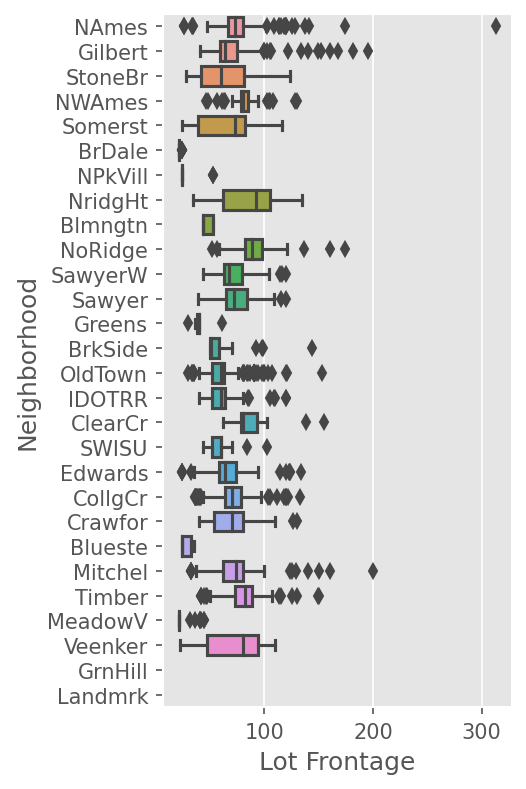

In [46]:
plt.figure(figsize=(3,6), dpi=150)
sns.boxplot(housing_prices, x='Lot Frontage', y='Neighborhood', orient='h')
plt.show()

For each neighborhood the mean value needs to be determined, which can be done by the <code>groupby</code> method in combination with the <code> mean </code> method

In [47]:
housing_prices.groupby('Neighborhood')['Lot Frontage'].mean().head()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
Name: Lot Frontage, dtype: float64

However if you want to replace the <code>NaN</code> values with the mean it is best to use the pandas <code>transform</code> method. 

In [48]:
housing_prices['Lot Frontage'] = housing_prices.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

The problem remains that certain neighborhoods don't have any houses sold in them (see boxplot), as a result the mean of no data = <code>NaN</code>, leading to 3 rows in *Lot Frontage* still containing a <code>NaN</code> value. 

In [49]:
housing_prices['Lot Frontage'].sort_values()
# housing_prices.isnull().sum().loc['Lot Frontage']

1040     21.0
2372     21.0
2371     21.0
2370     21.0
2369     21.0
        ...  
2278    200.0
1265    313.0
2256      NaN
2788      NaN
2892      NaN
Name: Lot Frontage, Length: 2924, dtype: float64

For these couple value we will settle for a zero value

In [50]:
housing_prices['Lot Frontage'] = housing_prices['Lot Frontage'].fillna(0)
housing_prices.isnull().sum().sum()

0

## Categorical Data

We need to be careful when considering the *MSSubClass* feature as its data type is numeric, but a higher value does not mean it is better, there is no ranking of the numbers. A predictive model will assume the order matters.

>MSSubClass: Identifies the type of dwelling involved in the sale.	
>
>        20	1-STORY 1946 & NEWER ALL STYLES
>        30	1-STORY 1945 & OLDER
>        40	1-STORY W/FINISHED ATTIC ALL AGES
>        45	1-1/2 STORY - UNFINISHED ALL AGES
>        50	1-1/2 STORY FINISHED ALL AGES
>        60	2-STORY 1946 & NEWER
>        70	2-STORY 1945 & OLDER
>        75	2-1/2 STORY ALL AGES
>        80	SPLIT OR MULTI-LEVEL
>        85	SPLIT FOYER
>        90	DUPLEX - ALL STYLES AND AGES
>       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
>       150	1-1/2 STORY PUD - ALL AGES
>       160	2-STORY PUD - 1946 & NEWER
>       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
>       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

The solution is to first convert them to string values, and then use dummie variables 

In [51]:
housing_prices['MS SubClass'] = housing_prices['MS SubClass'].apply(str)

housing_prices_object = housing_prices.select_dtypes(include='object')  # get all columns that are dtype "object" (string)
housing_prices_numeric = housing_prices.select_dtypes(exclude='object')  # get all columns that are NOT dtype "object" (string)

housing_prices_objects_dummies = pd.get_dummies(housing_prices_object, drop_first=True)

final_df = pd.concat([housing_prices_numeric, housing_prices_objects_dummies], axis='columns')
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,False,False,False,False,True,False,False,False,True,False
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,False,False,False,False,True,False,False,False,True,False
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,False,False,False,False,True,False,False,False,True,False
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,False,False,False,False,True,False,False,False,True,False
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,False,False,False,False,True,False,False,False,True,False
2926,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,False,False,False,False,True,False,False,False,True,False
2927,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,False,False,False,False,True,False,False,False,True,False
2928,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,False,False,False,False,True,False,False,False,True,False


We will not use all 274 columns, we can use correlation factors, regularization, and other techniaues to determine which features are of importance. 